# week 8

## goals:
- 

## todo
- 


## notes:

looked at:
- Pacific Islands (PIPA)
- Palau National Marine Sanctuary
- Natural Park of the Coral Seas


- Ross Sea
- PIPA
- PMNM
- south/central pacific ocean
- pick out the 5 from Tim White's paper:
    - PIPA - 2010, expanded 2014 <-- some actual results here
    - Pacific Remote Islands - 2009, expanded 2014 (not enough effort)
    - PMNM - yes but low fishing effort (3258 hours, 2016)
    - Pitcairn Islands - yes but low (101 hours, 2016)
    - Nazca-Desventuradas - yes but low (68 hours, 2016)
    
Actual good ones:
- Natural Park of the Coral Seas, 2014 555577562, further off the east coast of Australia
- Marae Moana/Cook Islands, 2017 555624907 - maybe the best one - middle of the Pacific
- French Austral Lands and Seas, 2019 555697868 - south-east of Africa
- Arquipélago Submarino Do Meteor, 2016 555514087 - Atlantic ocean Y shaped area
- Coral Sea, 2018 555556875 just off the east coast of Australia
- Pacífico Mexicano Profundo, 2018 555624307 southwest Mexican coast
- Palau National Marine Sanctuary, 2015, 555622118 oceania (near indonesia, phillippines) 


A bunch of these at the top are coastal around Spain/France:
- Espacio marino del Delta de l'Ebre-Illes Columbretes 2014
- Espacio marino de la Costa da Morte 2014
- Pertuis charentais - Rochebonne 2019




In [1]:
cd /Users/brendan/Masters/gfw_research

/Users/brendan/Masters/gfw_research


In [2]:
import numpy as np
import pandas
from datetime import datetime
import matplotlib.pyplot as plt
import os
import pywdpa
import geopandas
import contextily as ctx
from shapely import geometry
import pretty_html_table

import util 

pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)

In [3]:
# sample the points here (100 of them) before converting to geo
# use the sampled points to find the mmsi that are interesting
# only then should I get all of the points of relevent mmsi

mpas = util.load_mpas()
full_points = util.load_points()
SAMPLE_RATIO = 100
points_sampled = full_points.sample(frac=1/SAMPLE_RATIO)
geopoints_sampled = util.convert_to_geo(points_sampled, box=True)



loading mpas: 3/3 done.
loading points
 2013-12-20.csv 1826/1827
loaded.


running sjoin... 
found 672 sampled points in the mpa from 19 ships
found 79559 points of mpa ships
running sjoin on geopoints of mpa ships


,mmsi,in_pre,out_pre,in_post,out_post,pre_percent_in,post_percent_in
16,540010700,5810.635254,1327.603516,5875.165527,1086.891724,0.814015,0.843884
8,540003400,5382.174316,165.975281,6747.389648,651.320251,0.970085,0.911968
17,540010800,5144.178711,1329.970337,6391.914062,1127.094482,0.794572,0.850101
18,540011500,3707.993164,832.209839,6493.372559,753.155273,0.816702,0.896067
5,540002100,3331.191406,565.005859,8230.833984,866.645020,0.854985,0.904738
4,540002000,3291.056152,862.164978,4346.208984,764.090149,0.792411,0.850480
13,540004200,3208.534912,529.809998,5591.568848,309.940002,0.858277,0.947481
11,540004000,3036.159424,471.154175,8359.794922,1108.721069,0.865665,0.882904
14,540005000,2887.984619,89.689857,7298.331055,1222.523315,0.969879,0.856526
3,540001900,2858.342285,939.601807,8237.370117,989.085693,0.752603,0.892799


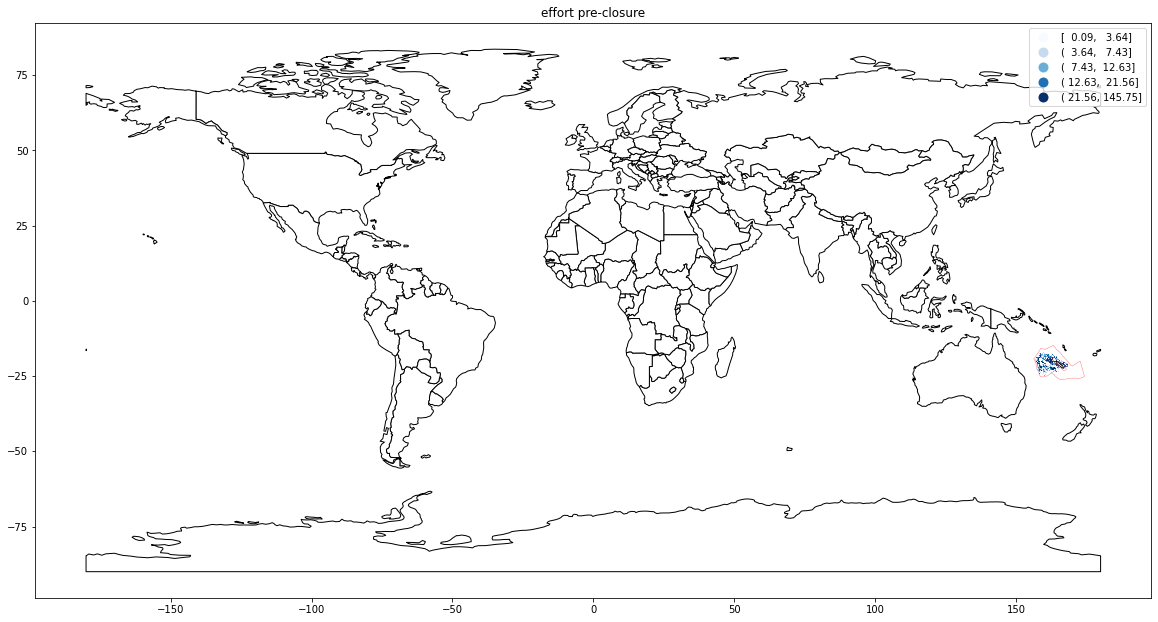

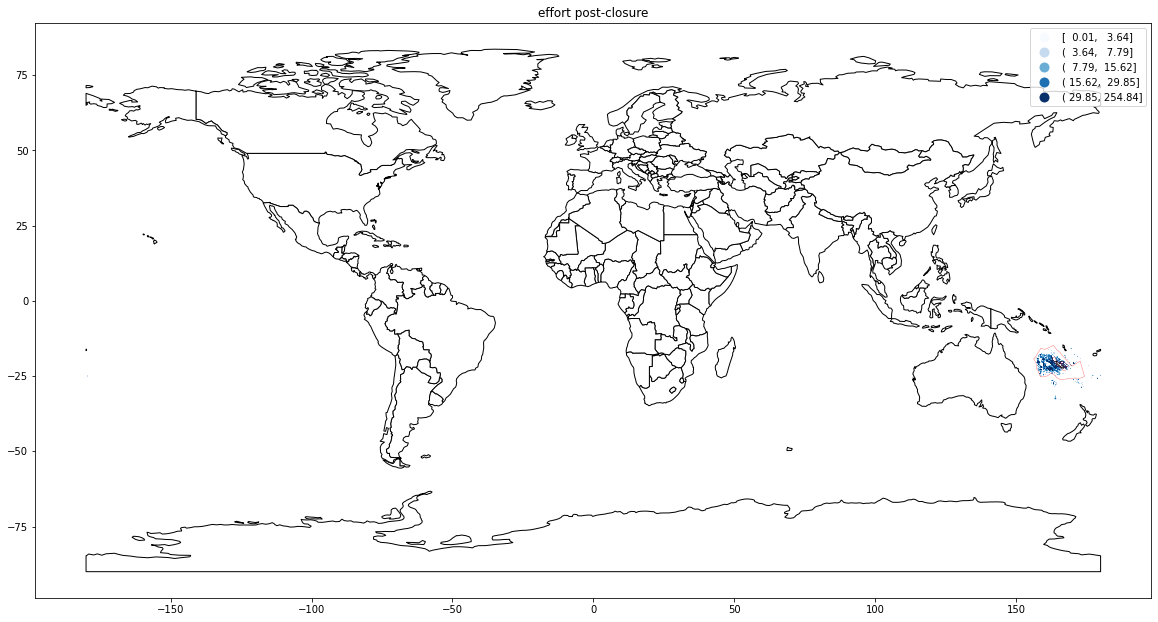

In [4]:
coral_park = mpas[mpas['WDPAID'] == 555577562.0]
coral_park_date = '2014-05-28'
coral_park_results = util.analyze_mpa(geopoints_sampled, full_points, coral_park, coral_park_date)
coral_park_results[0]

running sjoin... 
found 652 sampled points in the mpa from 130 ships
found 1138283 points of mpa ships
running sjoin on geopoints of mpa ships


,mmsi,in_pre,out_pre,in_post,out_post,pre_percent_in,post_percent_in
92,440986000,6762.854004,13653.585938,0.000000,13143.033203,0.331246,0.000000
28,440239000,4381.992676,15325.639648,0.000000,10026.125977,0.222350,0.000000
65,440781000,4198.424316,15596.604492,0.000000,13024.875977,0.212095,0.000000
16,416004242,3707.391846,9140.885742,0.000000,12256.141602,0.288552,0.000000
75,440821000,3651.866211,10943.253906,23.307222,10761.352539,0.250211,0.002161
47,440624000,3448.097900,16279.273438,0.000000,4918.476562,0.174787,0.000000
106,441644000,3108.078125,17536.976562,0.000000,10254.239258,0.150548,0.000000
79,440894000,2879.223389,11207.629883,108.170418,13570.179688,0.204391,0.007908
54,440648000,2830.075195,17513.375000,6.572639,13481.247070,0.139115,0.000487
67,440787000,2623.481689,24359.492188,0.000000,16287.734375,0.097227,0.000000


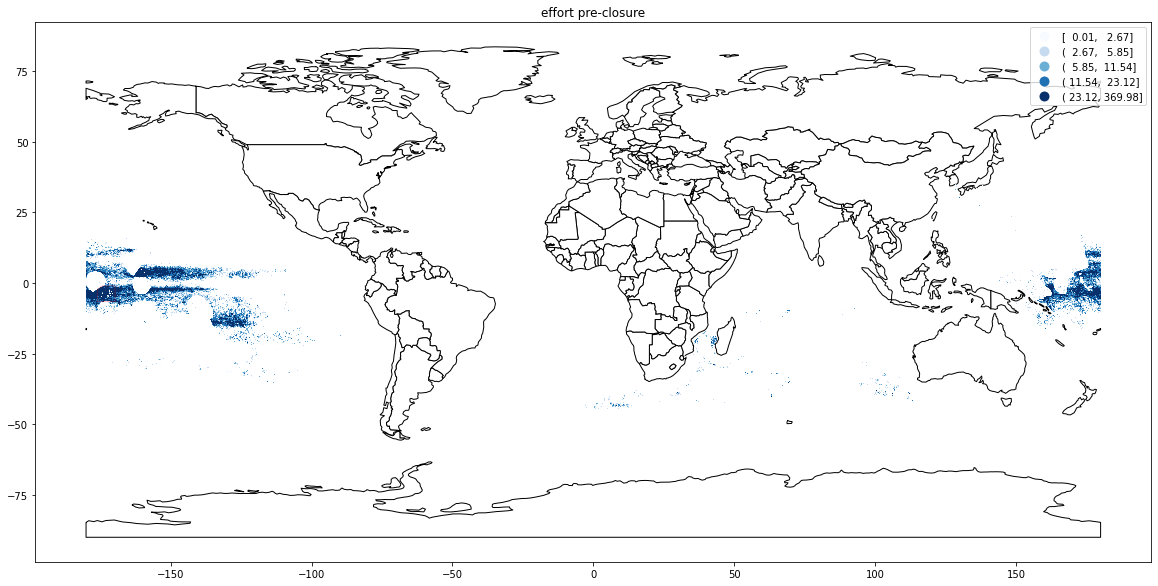

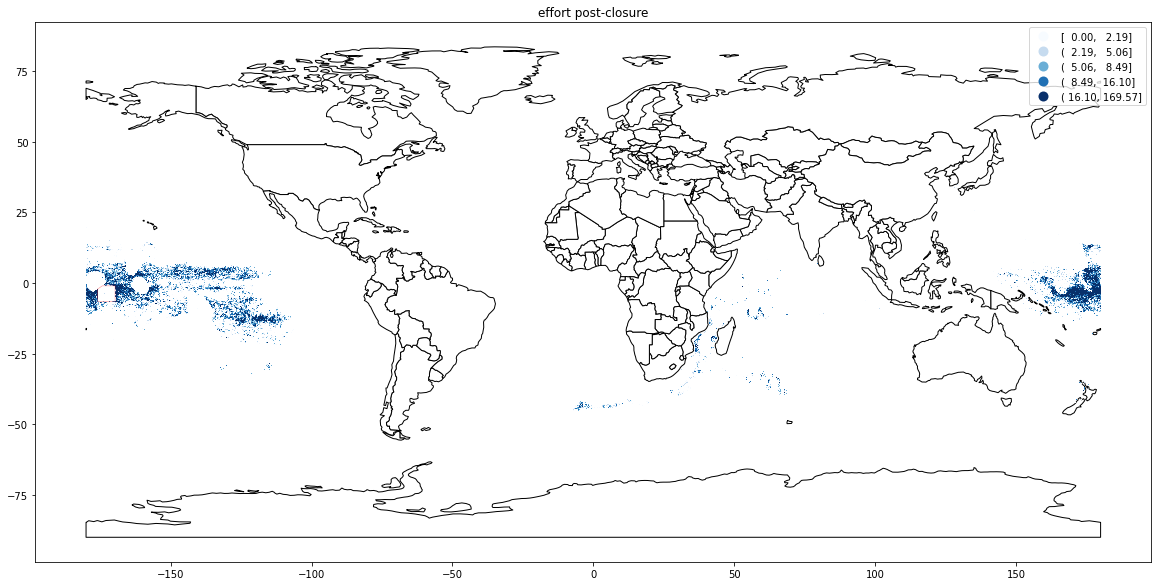

In [6]:
pipa = mpas[mpas['WDPAID'] == 555512002.0]
pipa_date = '2015-01-01'
pipa_results = util.analyze_mpa(geopoints_sampled, full_points, pipa, pipa_date)
pipa_results[0]

In [15]:
pipa_results[0][:30]

,mmsi,in_pre,out_pre,in_post,out_post,pre_percent_in,post_percent_in
92,440986000,6762.854004,13653.585938,0.000000,13143.033203,0.331246,0.000000
28,440239000,4381.992676,15325.639648,0.000000,10026.125977,0.222350,0.000000
65,440781000,4198.424316,15596.604492,0.000000,13024.875977,0.212095,0.000000
16,416004242,3707.391846,9140.885742,0.000000,12256.141602,0.288552,0.000000
75,440821000,3651.866211,10943.253906,23.307222,10761.352539,0.250211,0.002161
47,440624000,3448.097900,16279.273438,0.000000,4918.476562,0.174787,0.000000
106,441644000,3108.078125,17536.976562,0.000000,10254.239258,0.150548,0.000000
79,440894000,2879.223389,11207.629883,108.170418,13570.179688,0.204391,0.007908
54,440648000,2830.075195,17513.375000,6.572639,13481.247070,0.139115,0.000487
67,440787000,2623.481689,24359.492188,0.000000,16287.734375,0.097227,0.000000


In [11]:
_, pre, post = pipa_results
pre['fishing_hours'] = pre['fishing_hours'] * -1
diff = pandas.concat([pre, post]).groupby(['lat_bin', 'lon_bin'], as_index=False).aggregate({'geometry': 'first', 'fishing_hours': 'sum'})


Text(0.5, 1.0, 'difference in fishing effort (post - pre) of affected vessels')

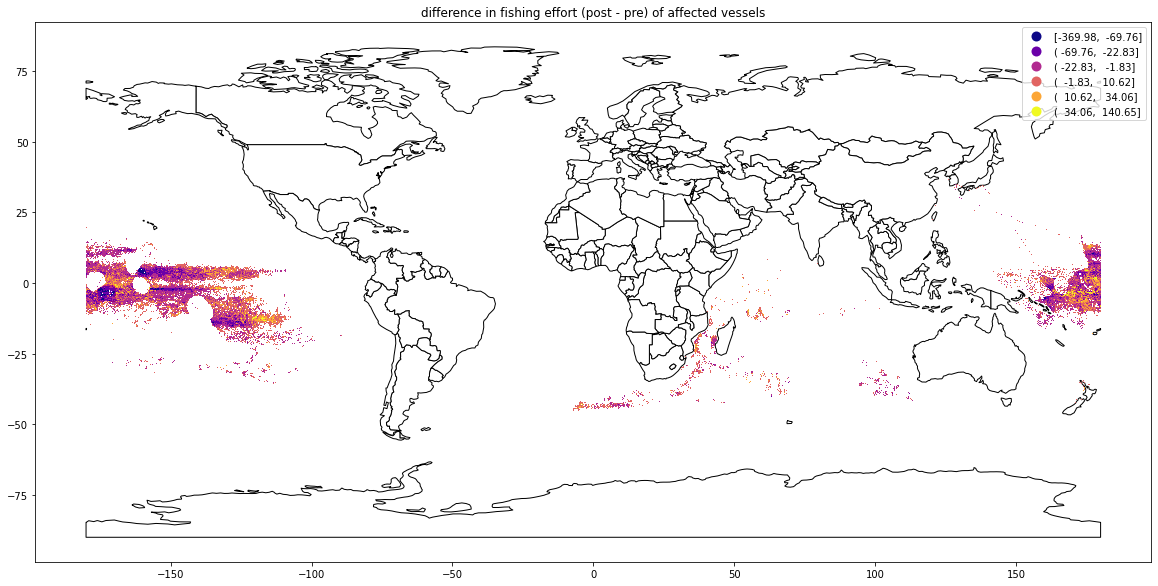

In [12]:
## diff plot
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(color='white', edgecolor='black', figsize=(20, 30))

#ax = park_coral_points.plot(column='fishing_hours', figsize=(20, 30), cmap='Blues', scheme='quantiles', legend=True)

diff.plot(column='fishing_hours', cmap='plasma', scheme='percentiles', ax=ax, legend=True)



LINEWIDTH = 0.5
pipa.plot(ax=ax, color='None', edgecolor='red', linewidth=LINEWIDTH, alpha=0.5)

plt.title('difference in fishing effort (post - pre) of affected vessels')

running sjoin... 
found 32 sampled points in the mpa from 13 ships
found 9377 points of mpa ships
running sjoin on geopoints of mpa ships


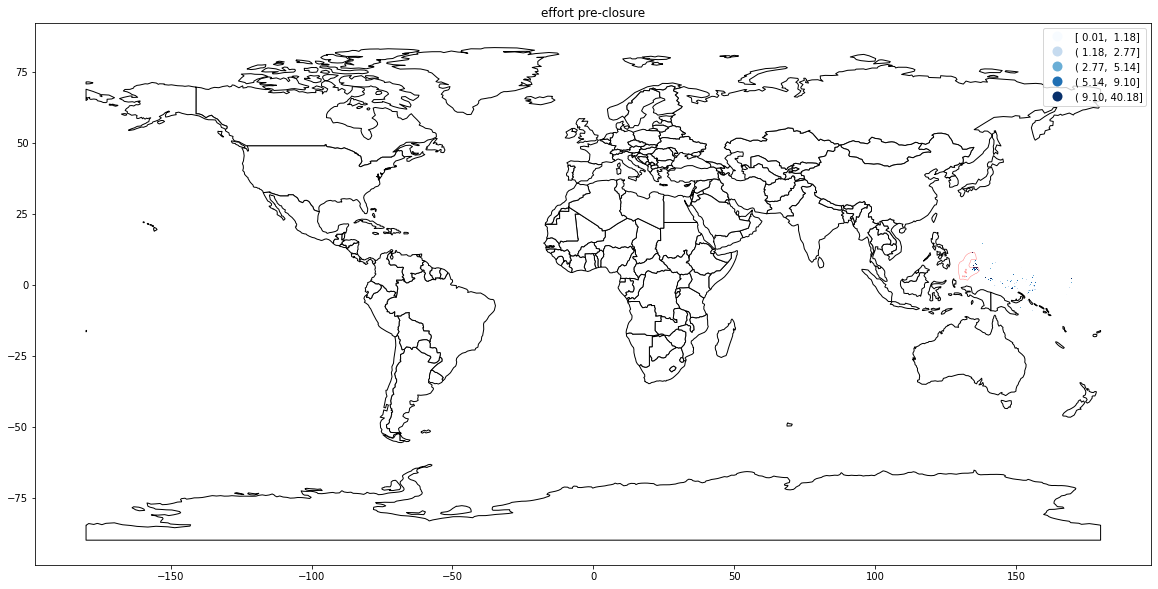

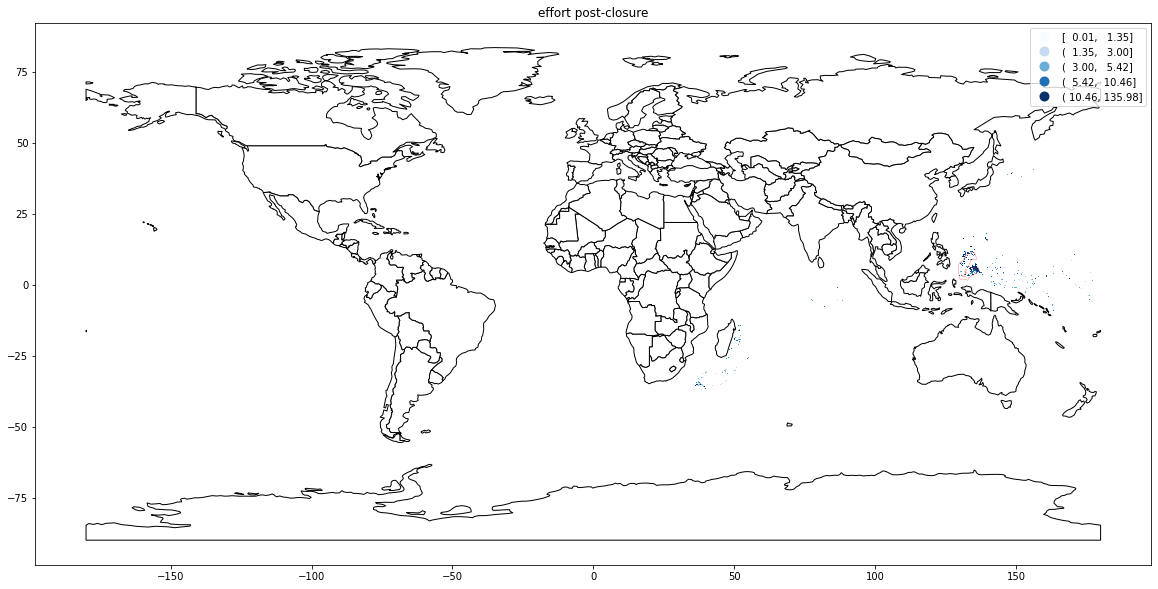

In [9]:
palau = mpas[mpas['WDPAID'] == 555622118.0]
palau_date = '2015-06-01'
palau_results = util.analyze_mpa(geopoints_sampled, full_points, palau, palau_date)


In [10]:
palau_results[0]

,mmsi,in_pre,out_pre,in_post,out_post,pre_percent_in,post_percent_in
6,416002251,922.253052,2807.835938,0.000000,5562.070801,0.247247,0.000000
9,431155000,79.542358,1875.605225,27.263056,2536.509521,0.040684,0.010634
0,41269518,0.000000,0.000000,1150.334961,1377.756226,NaN,0.455021
1,416000333,0.000000,0.000000,244.351944,222.315826,NaN,0.523610
2,416000358,0.000000,0.000000,692.037781,670.151367,NaN,0.508034
3,416001774,0.000000,0.000000,905.240295,1274.505127,NaN,0.415296
4,416002017,0.000000,0.000000,2472.116943,853.145264,NaN,0.743435
5,416002109,0.000000,0.000000,2556.929688,1597.128052,NaN,0.615526
7,416002514,0.000000,0.000000,1789.437500,2137.218506,NaN,0.455715
8,416003505,0.000000,0.000000,1879.465576,661.036804,NaN,0.739801


Text(0.5, 1.0, 'marine protected areas')

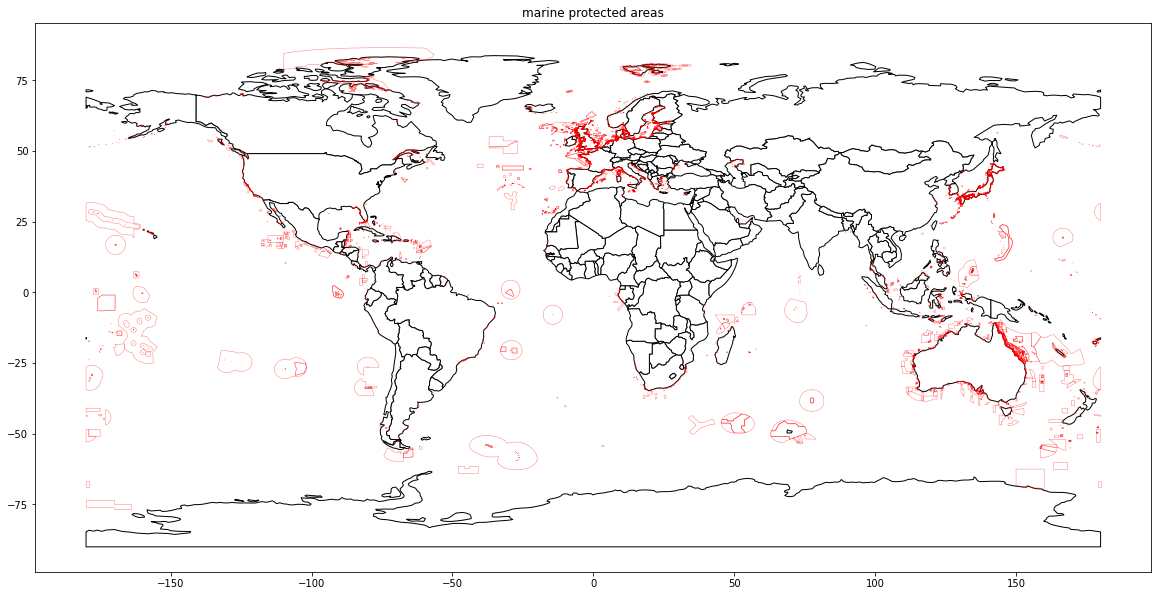

In [13]:
## diff plot
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(color='white', edgecolor='black', figsize=(20, 30))

#ax = park_coral_points.plot(column='fishing_hours', figsize=(20, 30), cmap='Blues', scheme='quantiles', legend=True)

#diff.plot(column='fishing_hours', cmap='plasma', scheme='percentiles', ax=ax, legend=True)



LINEWIDTH = 0.5
mpas.plot(ax=ax, color='None', edgecolor='red', linewidth=LINEWIDTH, alpha=0.5)

plt.title('marine protected areas')

In [16]:
mpas.count()

WDPAID        5831
WDPA_PID      5831
PA_DEF        5831
NAME          5831
ORIG_NAME     5831
DESIG         5831
DESIG_ENG     5831
DESIG_TYPE    5831
IUCN_CAT      5831
INT_CRIT      5831
MARINE        5831
REP_M_AREA    5831
GIS_M_AREA    5831
REP_AREA      5831
GIS_AREA      5831
NO_TAKE       5831
NO_TK_AREA    5831
STATUS        5831
STATUS_YR     5831
GOV_TYPE      5831
OWN_TYPE      5831
MANG_AUTH     5831
MANG_PLAN     5831
VERIF         5831
METADATAID    5831
SUB_LOC       5831
PARENT_ISO    5831
ISO3          5831
SUPP_INFO     5831
CONS_OBJ      5831
geometry      5831
dtype: int64